<h1 align=center>Capítulo 9: spaCy e transformadores</h1)
<p align=center><img src=https://explosion.ai/static/6f986e95f28531d728b13625c583cc25/d0aba/spacy-transformers_social.jpg width=500></p>

Neste capítulo, você aprenderá sobre o tópico mais recente em NLP, transformadores e como usá-los com TensorFlow e spaCy.

Primeiro, você aprenderá sobre transformadores e transferência de aprendizado. Em segundo lugar, você aprenderá sobre os detalhes da arquitetura de transformadores comumente usada – **Representações de codificador bidirecional de transformadores (BERT)**. Você também aprenderá como os algoritmos **BERT Tokenizer** e **WordPiece** funcionam. Então você aprenderá como começar rapidamente com modelos de transformadores pré-treinados da biblioteca **HuggingFace**. Em seguida, você praticará como ajustar transformadores HuggingFace com TensorFlow e Keras. Por fim, você aprenderá como o spaCy v3.0 integra modelos de transformadores como pipelines pré-treinados.

Ao final deste capítulo, você estará completando os tópicos estatísticos de NLP deste livro. Você adicionará seu conhecimento de transformadores ao conhecimento de Keras e TensorFlow adquirido no Capítulo 8, Classificação de texto com spaCy. Você será capaz de construir modelos de NLP de última geração com apenas algumas linhas de código com o poder dos modelos Transformer e transferência de aprendizado.

Neste capítulo, abordaremos os seguintes tópicos principais:
* Transformadores e aprendizado de transferência
* Compreendendo o BERT
* Transformadores e TensorFlow
* Transformadores e spaCy

## Transformadores e aprendizado de transferência
Um marco na NLP aconteceu em 2017 com o lançamento do trabalho de pesquisa Attention Is All You Need, de Vaswani et al. (https://arxiv.org/abs/1706.03762), que introduziu uma nova ideia e arquitetura de aprendizado de máquina – transformadores. *Transformers* em NLP é uma ideia nova que visa resolver tarefas de modelagem sequencial e tem como alvo alguns problemas introduzidos pela arquitetura de **memória de longo prazo (LSTM)**. Veja como o artigo explica como os transformadores funcionam:
 > "O *Transformer* é o primeiro modelo de transdução que depende inteiramente da autoatenção para calcular as representações de sua entrada e saída sem usar RNNs alinhados à sequência ou convolução".

A transdução neste contexto significa transformar palavras de entrada em palavras de saída, transformando palavras de entrada e sentenças em vetores. Normalmente, um transformador é treinado em um corpus enorme, como Wiki ou notícias. Então, em nossas tarefas de downstream, usamos esses vetores, pois eles carregam informações sobre a semântica das palavras, a estrutura da frase e a semântica da frase (veremos como usar os vetores precisamente em nosso código na seção *Transformers* e *TensorFlow*).

Já exploramos a ideia de vetores de palavras pré-treinados anteriormente. Os vetores de palavras, como os vetores *Glove* e *FastText*, já são treinados no corpus da Wikipedia e os usamos diretamente para nossos cálculos de similaridade semântica. Dessa forma, importamos informações sobre semântica de palavras do corpus Wiki para nossos cálculos de similaridade semântica. A importação de conhecimento de vetores de palavras pré-treinados ou modelos estatísticos pré-treinados é chamado de **aprendizado de transferência (transfer learning)**.

Os transformadores oferecem milhares de modelos pré-treinados para executar tarefas de NLP, como classificação de texto, resumo de texto, resposta a perguntas, tradução automática e geração de linguagem natural em mais de 100 idiomas. Os Transformers visam tornar a NLP de última geração acessível a todos.

A captura de tela a seguir mostra uma lista dos modelos de *Transformer* fornecidos pelo *HuggingFace* (aprenderemos sobre HuggingFace Transformers na seção HuggingFace Transformers). Cada modelo é nomeado com uma combinação do nome da arquitetura (Bert, DistilBert e assim por diante), possivelmente o código do idioma (*en*, *de*, multilíngue e similar, fornecido no lado esquerdo da captura de tela a seguir) e informações sobre se o modelo é maiúsculo ou não (o modelo distingue entre caracteres maiúsculos e minúsculos).

Além disso, no lado esquerdo da Figura abaixo, vemos os nomes das tarefas. Cada modelo é rotulado com um nome de tarefa. Selecionamos um modelo adequado para nossa tarefa, como classificação de texto ou tradução automática:

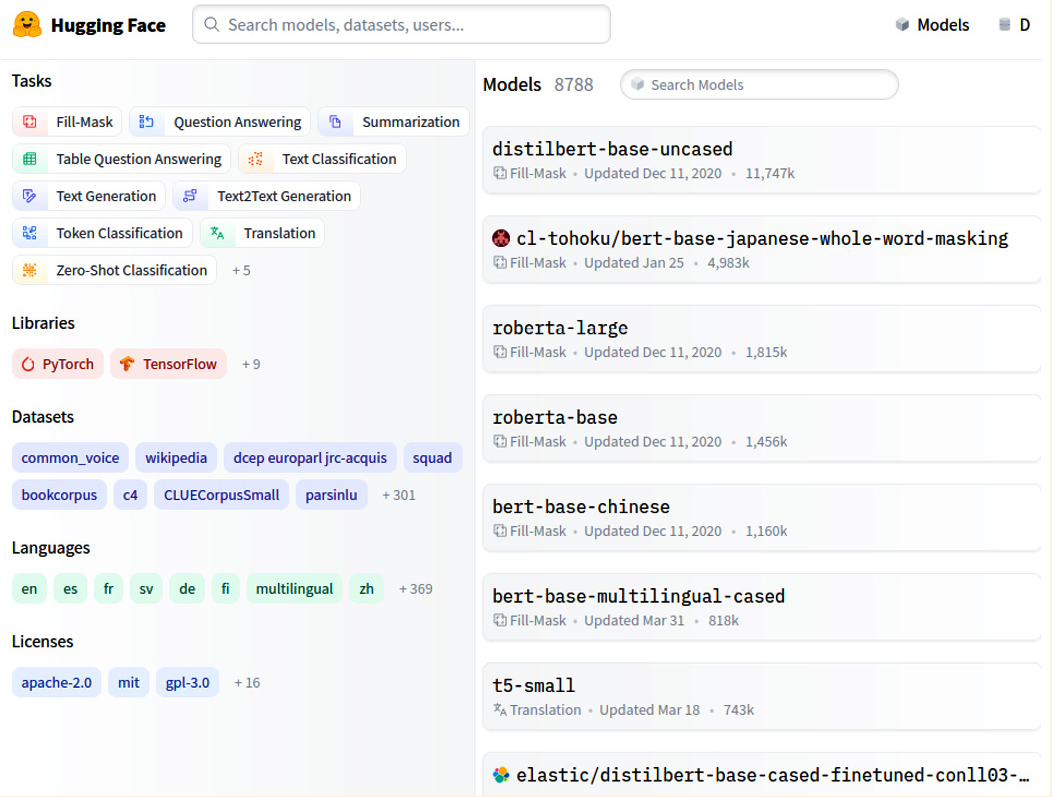

In [1]:
from IPython.display import Image
Image('images/huggingFace_models.PNG')

Para entender o que é ótimo sobre transformadores, vamos primeiro revisitar a arquitetura LSTM. No capítulo anterior, já entramos no mundo da modelagem estatística com a arquitetura Keras e LSTM. LSTMs são ótimos para modelar texto; no entanto, eles também têm algumas deficiências:
* a arquitetura LSTM às vezes tem dificuldades em aprender textos longos. As dependências estatísticas em um texto longo podem ser difíceis de representar por um LSTM porque, à medida que as etapas de tempo passam, o LSTM pode esquecer algumas das palavras que foram processadas em etapas de tempo anteriores.
* A natureza dos LSTMs é sequencial. Processamos uma palavra em cada passo de tempo. Obviamente, paralelizar o processo de aprendizagem não é possível; temos que processar sequencialmente. Não permitir a paralelização cria um gargalo de desempenho.

Os transformadores resolvem esses problemas não usando camadas recorrentes. Se dermos uma olhada a seguir, a arquitetura parece completamente diferente de uma arquitetura LSTM. A arquitetura do transformador consiste em duas partes – um bloco codificador de entrada (chamado **Encoder**) à esquerda e o bloco decodificador de saída (chamado **Decoder**) à direita. O diagrama a seguir é retirado deste artigo e exibe a arquitetura do transformador:

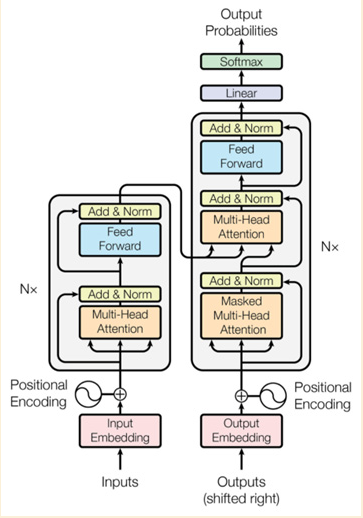

In [2]:
Image('images/transformers_architecture.PNG')

A arquitetura anterior é inventado para uma tarefa de tradução automática; portanto, a entrada é uma sequência de palavras do idioma de origem e a saída é uma sequência de palavras do idioma de destino. O codificador gera uma representação vetorial das palavras de entrada e as passa para o decodificador (a transferência do vetor de palavras é representada pela seta do bloco do codificador na direção do bloco do decodificador). O decodificador pega esses vetores de palavras de entrada, transforma as palavras de saída em vetores de palavras e, finalmente, gera a probabilidade de cada palavra de saída (rotulada na Figura acima como **Probabilidades de Saída (Output Probabilities**).

Dentro dos blocos do codificador e do decodificador, vemos camadas feedforward, que são basicamente uma camada densa. A inovação que os transformadores trazem está no bloco **Multi-Head Attention**. Este bloco cria uma representação densa para cada palavra usando um mecanismo de autoatenção. O mecanismo de **autoatenção** relaciona cada palavra na frase de entrada com as outras palavras na frase de entrada. A incorporação de cada palavra é calculada tomando uma média ponderada das incorporações das outras palavras. Dessa forma, a importância de cada palavra na frase de entrada é calculada, de modo que a arquitetura foca sua atenção em cada palavra de entrada por vez.

O diagrama a seguir foi retirado do artigo original e ilustra a auto-atenção. O diagrama ilustra como as palavras de entrada no lado esquerdo atendem à palavra de entrada "**it**" no lado direito. Cores mais escuras significam mais relevância, portanto, as palavras "**the animal**" estão mais relacionadas a "**it**" do que as outras palavras nesta frase. O que isto significa? Isso significa que o transformador pode resolver que o pronome "**It**" se refere precisamente nesta frase, a frase "**the animal**". Esta é uma grande conquista dos transformadores; eles podem resolver muitas dependências semânticas em uma determinada frase:

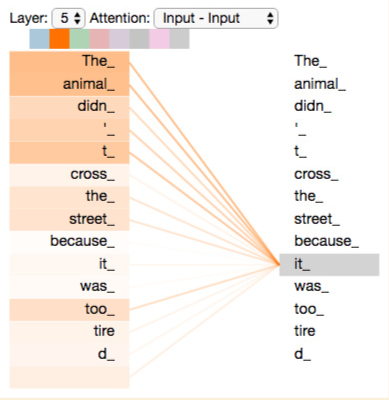

In [3]:
Image('images/self_attention.PNG')

Se você quiser conhecer os detalhes da arquitetura do Transformer, visite http:/ /jalammar.github.io/ilustrado-transformer/. Esta palestra no YouTube também explica o mecanismo de autoatenção e os transformadores para todos os níveis de desenvolvedores de NLP: https://www.youtube.com/watch? v=rBCqOTEfxvg.

Já vimos que existe uma variedade de arquiteturas de transformadores e, dependendo da tarefa, usamos diferentes tipos de transformadores para diferentes tarefas, como classificação de texto e tradução automática. No restante deste capítulo, trabalharemos com uma arquitetura de transformador muito popular – BERT. Vamos ver a arquitetura BERT e como usá-la em nossos aplicativos NLP na próxima seção.

## Entendendo o BERT
Nesta seção, exploraremos o modelo Transformer mais influente e comumente usado, o BERT. O BERT é apresentado no artigo de pesquisa do Google aqui: https://arxiv.org/pdf/1810.04805.pdf.

O que o BERT faz exatamente? Para entender o que o BERT produz, vamos dissecar o nome:
* **Bidirecional**: O treinamento nos dados de texto é bidirecional, o que significa que cada sentença de entrada é processada da esquerda para a direita e da direita para a esquerda.
* **Codificador**: Um codificador codifica a sentença de entrada.
* **Representações**: Uma representação é um vetor de palavras.
* **Transformadores**: A arquitetura é baseada em transformadores.

O BERT é essencialmente uma pilha de codificador de transformador treinado. A entrada no BERT é uma sentença e a saída é uma sequência de vetores de palavras. Os vetores de palavras são contextuais, o que significa que um vetor de palavras é atribuído a uma palavra com base na sentença de entrada. Em resumo, o BERT produz **representações de palavras contextuais**.

Já vimos uma série de problemas que os transformadores pretendem resolver na seção anterior. Outro problema que os transformadores tratam diz respeito aos vetores de palavras. Vimos que os vetores de palavras são livres de contexto; o vetor de palavras para uma palavra é sempre o mesmo independente da frase em que é usado. O diagrama a seguir explica esse problema:

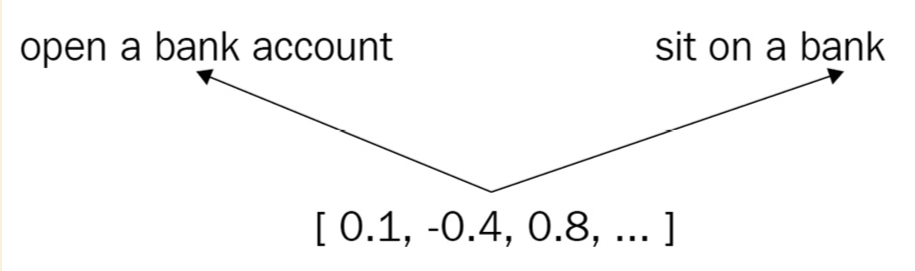

In [4]:
Image('images/bank.PNG')

Aqui, mesmo que a palavra **bank** tenha dois significados completamente diferentes nessas duas frases, os vetores de palavras são os mesmos, porque Glove e FastText são **estáticos**. Cada palavra tem apenas um vetor e os vetores são salvos em um arquivo após o treinamento. Em seguida, baixamos esses vetores pré-treinados e os carregamos em nosso aplicativo.

Pelo contrário, os vetores de palavras BERT são **dinâmicos**. O BERT pode gerar diferentes vetores de palavras para a mesma palavra, dependendo da frase de entrada. O diagrama a seguir mostra os vetores de palavras gerados pelo BERT, em contraste com o vetor de palavras na Figura anterior.

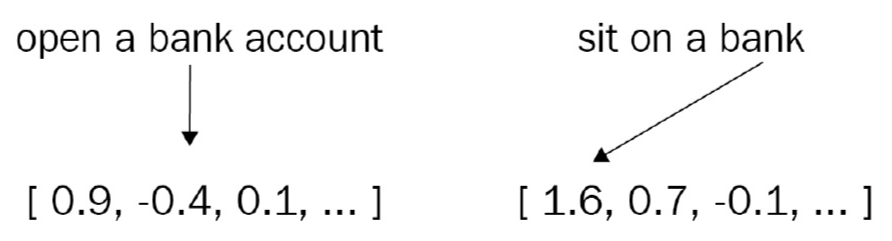

In [5]:
Image('images/bank_BERT.PNG')

Como o BERT gera esses vetores de palavras? Na próxima seção, exploraremos os detalhes da arquitetura BERT.

### Arquitetura BERT
Como já foi observado na seção anterior, BERT é uma pilha de codificador de transformador, o que significa que várias camadas de codificador são empilhadas umas sobre as outras. A primeira camada inicializa os vetores de palavras aleatoriamente e, em seguida, cada camada do codificador transforma a saída da camada do codificador anterior. O documento apresenta dois tamanhos de modelo para BERT: BERT Base e BERT Large. O diagrama a seguir mostra a arquitetura BERT:

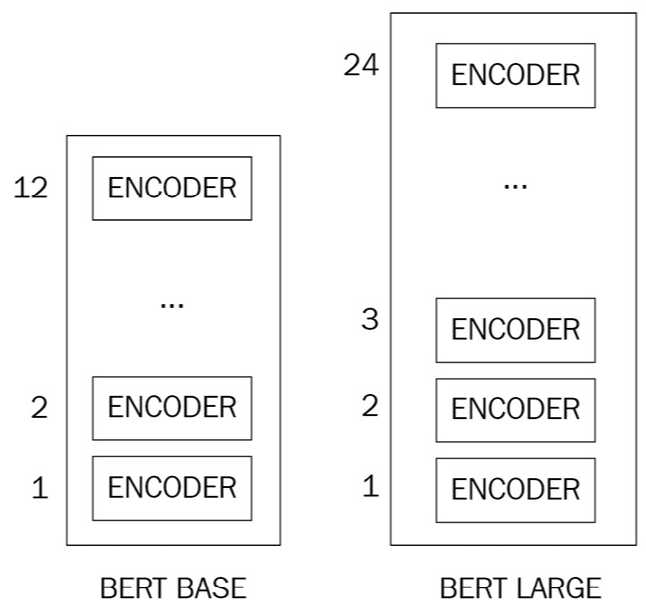

In [6]:
Image('images/BERT_base.PNG')


Arquiteturas BERT Base e Large, com 12 e 24 camadas de codificador, respectivamente camadas do codificador. O BERT Base possui 12 camadas de codificador e o BERT Large possui 24 camadas de codificador. As dimensões dos vetores de palavras resultantes também são diferentes; O BERT Base gera vetores de palavras de tamanho 768 e o BERT Large gera vetores de palavras de tamanho 1024.

Como observamos na seção anterior, o BERT gera vetores de palavras para cada palavra de entrada. O diagrama a seguir exibe uma visão geral de alto nível das entradas e saídas do BERT (descarte o token CLS por enquanto; você aprenderá sobre ele na seção de formato de entrada do BERT):

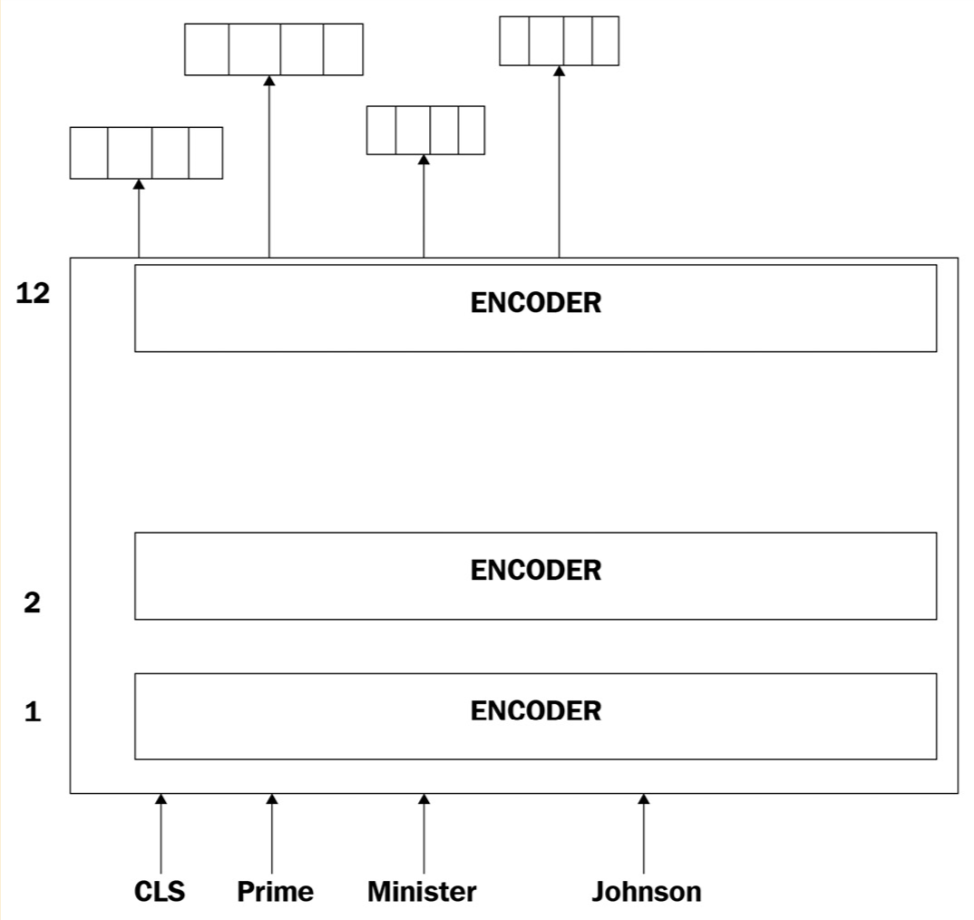

In [7]:
Image('images/BERT_output.PNG')

 Na figura anterior vemos vetores de palavra de entrada e palavra de saída do modelo BERT. No diagrama anterior, podemos ver uma visão geral de alto nível das entradas e saídas do BERT. De fato, a entrada do BERT precisa estar em um formato especial e inclui alguns tokens especiais, como CLS, na Figura anterior. Na próxima seção, você aprenderá sobre os detalhes do formato de entrada BERT.

### Formato de entrada BERT
Nós cobrimos a arquitetura BERT, então vamos agora entender como gerar os vetores de saída usando BERT. Para isso, conheceremos o formato dos dados de entrada do BERT. O formato de entrada BERT pode representar uma única sentença, bem como um par de sentenças (para tarefas como resposta a perguntas e similaridade semântica, inserimos duas sentenças no modelo) em uma única sequência de tokens.

O BERT trabalha com uma classe de **tokens especiais** e um algoritmo de tokenização especial chamado **WordPiece**. Vamos conhecer os tokens especiais primeiro. Os principais tokens especiais são **\[CLS\]**, **\[SEP\]** e **\[PAD\]**:
* O primeiro token especial do BERT é **\[CLS\]**. O primeiro token de cada sequência de entrada deve ser **\[CLS\]**. Usamos esse token em tarefas de classificação como um agregado da sentença de entrada. Ignoramos esse token em tarefas de não classificação.
* **\[SEP\]** significa um separador de frases. Se a entrada for uma única frase, colocamos esse token no final da frase. Se a entrada for duas sentenças, usaremos esse token para separar duas sentenças. Assim, para uma única sentença, a entrada se parece com **\[CLS] sentença \[SEP]**, e para duas sentenças, a entrada se parece com **\[CLS] sentença1 \[SEP] sentença2 \[SEP]**.
* **\[PAD]** é um token especial que significa **padding**. Lembre-se do capítulo anterior que usamos valores de preenchimento para criar sentenças em nosso conjunto de dados de tamanho igual. O BERT recebe sentenças de tamanho fixo; portanto, preenchemos as frases curtas antes de alimentá-las ao BERT. O tamanho máximo de tokens que podemos fornecer ao BERT é **512**.

Que tal tokenizar as palavras? Lembre-se da seção anterior que alimentamos uma frase ao nosso modelo Keras uma palavra de cada vez. Nós tokenizamos nossas sentenças de entrada em palavras usando o tokenizer spaCy. O BERT funciona de maneira um pouco diferente, o BERT usa tokenização WordPiece. Um "word piece" é literalmente um pedaço de uma palavra. O algoritmo WordPiece divide as palavras em várias subpalavras. A ideia é dividir tokens complexos/longos em tokens mais simples. Por exemplo, a palavra **playing** é tokenizada como **play** e **##ing**. Um caractere **##** é colocado antes de cada pedaço de palavra para indicar que esse token não é uma palavra do vocabulário do idioma, mas que é um pedaço de palavra.

Vamos dar uma olhada em mais alguns exemplos:
~~~python
playing play, ##ing
played play, ##ed
going go, ##ing
vocabulary = [play,go, ##ing, ##ed]
~~~
Desta forma, representamos o vocabulário do idioma de forma mais compacta, pois o WordPiece agrupa subpalavras comuns. A tokenização do WordPiece cria maravilhas em palavras raras/invisíveis, pois essas palavras são divididas em suas subpalavras.

Após tokenizar a sentença de entrada e adicionar os tokens especiais, cada token é convertido em seu ID. Depois disso, como etapa final, alimentamos a sequência de IDs de tokens para o BERT.

Para resumir, é assim que transformamos uma sentença no formato de entrada BERT:

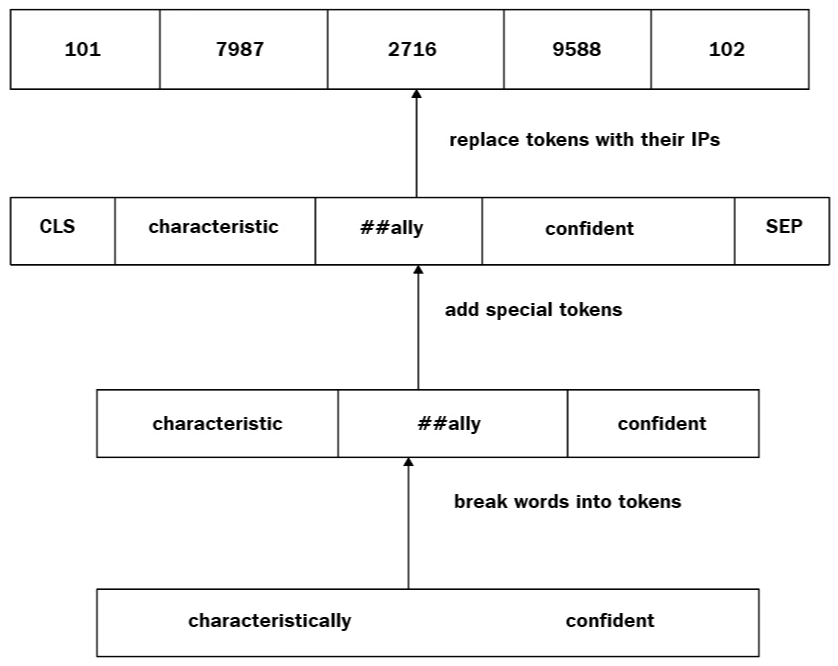

In [8]:
Image('images/BERT_transforming.PNG')

Na Figura acima, mostra ransformando uma sentença de entrada no formato de entrada BERT. O BERT Tokenizer possui métodos diferentes para realizar todas as tarefas descritas anteriormente, mas também possui um método de codificação que combina essas etapas em uma única etapa. Veremos como usar o BERT Tokenizer em detalhes na seção Transformers e TensorFlow. Antes disso, aprenderemos sobre os algoritmos usados para treinar o BERT.

### Como o BERT é treinado?
O BERT é treinado em um grande corpus Wiki não rotulado e em um enorme corpus de livros. Os criadores do BERT declararam o seguinte no repositório BERT GitHub da Google Research, https://github.com/google-research/bert, da seguinte forma:
> *"Nós então treinamos um modelo grande (Transformer de 12 a 24 camadas) em um corpus grande (Wikipedia + BookCorpus) por um longo tempo (etapas de atualização de 1 milhão), e isso é BERT."*

O BERT é treinado com dois métodos de treinamento, **modelo de linguagem mascarado (MLM)** e **previsão da próxima sentença (NSP)**. Vamos primeiro examinar os detalhes da modelagem de linguagem mascarada.

A modelagem de linguagem é a tarefa de prever o próximo token dada a sequência de tokens anteriores. Por exemplo, dada a sequência de palavras *Yesterday I visited*, um modelo de linguagem pode prever o próximo token como um dos tokens *church, hospital, school*, e assim por diante. A modelagem de linguagem mascarada é um pouco diferente. Nesta abordagem, mascaramos uma porcentagem dos tokens aleatoriamente substituindo-os por um token **\[MASK]** e esperamos que o MLM preveja as palavras mascaradas.

O modelo de linguagem mascarado no BERT é implementado da seguinte forma: Primeiro, 15 dos tokens de entrada são escolhidos aleatoriamente. Então, acontece o seguinte:
1. 80% dos tokens escolhidos são substituídos por **\[MASK]**.
2. 20% das fichas escolhidas são substituídas por outra ficha do vocabulário.
3. Os 10% restantes permanecem inalterados. Uma frase de exemplo de treinamento para LMM se parece com o seguinte:

	`[CLS] Yesterday I [MASK] my friend at [MASK] house [SEP]`

4. Em seguida, examinaremos os detalhes do outro algoritmo, NSP.

Como o nome sugere, NSP é a tarefa de prever a próxima sentença dada uma sentença de entrada. Nesta abordagem, alimentamos duas sentenças para o BERT e esperamos que o BERT preveja a ordem das sentenças, mais especificamente, se a segunda sentença for a sentença seguinte à primeira.

Vamos fazer um exemplo de entrada para NSP. Alimentaremos duas frases separadas pelo token **\[SEP]** como entrada:
~~~python
[CLS] A man robbed a [MASK] yesterday [MASK] 8 o'clock [SEP] He
[MASK] the bank with 6 million dollars [SEP]
Label = IsNext
~~~
Neste exemplo, a segunda frase pode seguir a primeira frase; portanto, o rótulo previsto é **IsNext**. Que tal este exemplo:
~~~python
[CLS] Rabbits like to [MASK] carrots and [MASK] leaves [SEP] [MASK]
Schwarzenegger is elected as the governor of [MASK] [SEP]
Label= NotNext
~~~
Este par de frases de exemplo gera o **NotNext** rótulo, pois obviamente eles não estão contextualmente ou semanticamente relacionados.

É isso! Aprendemos sobre a arquitetura BERT; também aprendemos os detalhes do formato de dados de entrada do BERT e como o BERT é treinado. Agora, estamos prontos para mergulhar no código do TensorFlow. Na próxima seção, veremos como aplicar o que aprendemos até agora em nosso código do TensorFlow.

## Transformadores e TensorFlow
Nesta seção, vamos mergulhar no código de transformadores com o TensorFlow. Modelos de transformadores pré-treinados são fornecidos à comunidade de desenvolvedores como código aberto por muitas organizações, incluindo Google (https://github.com/google-research/bert), Facebook (https://github.com/pytorch/fairseq/ blob/master/examples/language_model/README.md) e HuggingFace (https://github.com/huggingface/transformers). Todas as organizações listadas oferecem modelos pré-treinados e interfaces agradáveis para integrar transformadores em nosso código Python. As interfaces são compatíveis com PyTorch ou Tensorflow ou ambos.

Ao longo deste capítulo, usaremos os transformadores pré-treinados do *HuggingFace* e sua interface TensorFlow para os modelos de transformadores. HuggingFace é uma empresa de IA com foco em NLP bastante dedicada ao código aberto. Na próxima seção, veremos mais de perto o que está disponível em *HuggingFace Transformers*.

### Transformadores HuggingFace
Na primeira seção, descobriremos os modelos pré-treinados do HuggingFace, a interface TensorFlow para usar esses modelos e as convenções do modelo HuggingFace em geral. Vimos que o HuggingFace oferece diferentes tipos de modelos. Cada modelo é dedicado a uma tarefa, como classificação de texto, resposta a perguntas e modelagem de sequência a sequência.

O diagrama a seguir foi retirado da documentação do HuggingFace e mostra detalhes do modelo *distilbert-base-uncased-distilled-squad*. Na documentação, primeiro, a tarefa é marcada (canto superior esquerdo do diagrama; a tag Question Answering), seguida pelas bibliotecas de aprendizado profundo suportadas (PyTorch, TensorFlow, TFLite, TFSavedModel para este modelo), o conjunto de dados em que foi treinado (squad, neste caso), o idioma do modelo (*en* para inglês) e a licença e o nome do modelo base (DistilBERT neste caso).

Alguns modelos são treinados com algoritmos semelhantes e, portanto, pertencem à mesma família de modelos. A título de exemplo, a família DistilBERT inclui muitos modelos, como distilbert-base-uncased e distilbert-multilingual-case. Cada nome de modelo também inclui algumas informações, como *casing* (o modelo reconhece diferenças de maiúsculas/minúsculas) ou a linguagem do modelo, como *en*, *de* ou **multilíngue**:

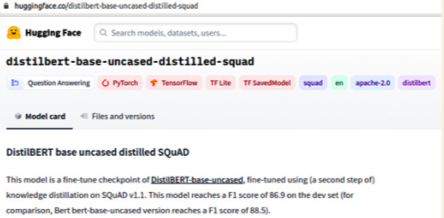

In [9]:
Image('images/MODEL_HUGGINGFACE.PNG')

Na Figura acima – Documentação do modelo distilbert-base-uncased-distilled-squad Figura 9.9. Já exploramos o BERT em detalhes na seção anterior. A documentação do HuggingFace fornece informações detalhadas sobre cada família de modelos e a API de um modelo individual. A Figura abaixo mostra uma lista de modelos disponíveis e uma lista de variações da arquitetura do modelo BERT:

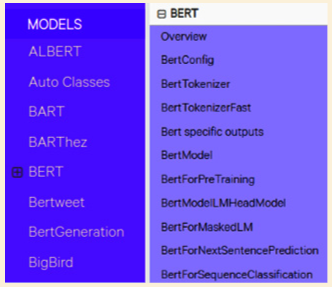

In [10]:
Image('images/BERT_models.PNG')

O modelo BERT tem muitas variações para uma variedade de tarefas, como classificação de texto, resposta a perguntas e previsão da próxima frase. Cada um desses modelos é obtido colocando algumas camadas extras no topo da saída do BERT. Lembre-se da seção anterior que a saída do BERT é uma sequência de vetores de palavras para cada palavra da sentença de entrada. Por exemplo, o modelo *BERTForSequenceClassification* é obtido colocando uma camada densa (cobrimos camadas densas no capítulo anterior) sobre os vetores de palavras BERT.

No restante deste capítulo, exploraremos como usar algumas dessas arquiteturas para nossas tarefas e também como usar vetores de palavras BERT com Keras. Antes de todas essas tarefas, começaremos com a tarefa básica de tokenização para preparar nossas sentenças de entrada. Vamos ver o código do tokenizer na próxima seção.

### Usando o tokenizer BERT
Na seção *Entendendo o BERT*, já vimos que o BERT usa o algoritmo WordPiece para tokenização. Cada palavra de entrada é dividida em subpalavras. Vamos ver como preparar nossos dados de entrada com a biblioteca HuggingFace.

As linhas a seguir exibem o uso básico do tokenizer:

In [11]:
from transformers import BertTokenizer
btokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
sentence = 'he lived characteristically idle and romantic.'
tokens = btokenizer.tokenize(sentence)
tokens

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

['he', 'lived', 'characteristic', '##ally', 'idle', 'and', 'romantic', '.']

In [12]:
ids = btokenizer.convert_tokens_to_ids(tokens)
ids

[2002, 2973, 8281, 3973, 18373, 1998, 6298, 1012]

Aqui estão as etapas que seguimos no bloco de código anterior:
1. Primeiro, importamos o **BertTokenizer**. Modelos diferentes têm tokenizers diferentes; por exemplo, o tokenizer do modelo XLNet é chamado **XLNetTokenizer**.
2. Em segundo lugar, chamamos o método **from_pretrained** no objeto tokenizer e fornecemos o nome do modelo. Observe que não precisamos baixar manualmente o modelo *bert-base-uncased* pré-treinado; este método baixa o modelo sozinho.
3. Em seguida, chamamos o método **tokenize**. **tokenize** basicamente tokeniza a frase quebrando todas as palavras em subpalavras.
4. Imprimimos tokens para examinar as subpalavras. As palavras "he", "lived", "idle" e assim por diante existem no vocabulário do Tokenizer e, portanto, são mantidas como estão. "Characteristically" é uma palavra rara, então não existe no vocabulário do Tokenizer. Em seguida, o Tokenizer divide essa palavra nas subpalavras "characteristic" e "##ally". Observe que "##ally" começa com os caracteres "##" para enfatizar o fato de que esta é uma palavra.
5. Em seguida, convertemos os tokens em seus IDs de token chamando **convert_tokens_to_ids**.

E quanto aos tokens **\[CLS]** e **\[SEP]**? Na seção anterior, já vimos que temos que adicionar esses dois tokens especiais ao início e ao final da sentença de entrada. Para o código anterior, precisamos envolver mais uma etapa e adicionar nossos tokens especiais manualmente. Podemos fazer todas essas etapas de pré-processamento em uma única etapa, talvez? A resposta é sim; O BERT fornece um método chamado **encode** que faz o seguinte:
* Adiciona tokens **CLS** e **SEP** à sentença de entrada
* Tokeniza a sentença dividindo os tokens em subpalavras
* Converte os tokens em seus IDs de token

Chamamos o método **encode** diretamente na sentença de entrada da seguinte forma:

In [13]:
from transformers import BertTokenizer
btokenizer =\
BertTokenizer.from_pretrained('bert-base-uncased')
sentence = "He lived characteristically idle and romantic."
ids = btokenizer.encode(sentence)
ids

[101, 2002, 2973, 8281, 3973, 18373, 1998, 6298, 1012, 102]

Esse segmento de código gera os IDs de token em apenas uma única etapa, em vez de chamar **tokenize** e **convert_tokens_to_ids** um após o outro. O resultado é uma lista Python.

Que tal preencher a frase? Já vimos na seção anterior que todas as sentenças de entrada em um conjunto de dados devem ter o mesmo tamanho porque o BERT não pode processar sentenças de comprimento variável. Portanto, precisamos preencher as frases curtas com o comprimento da frase mais longa disponível no conjunto de dados. Além disso, se quisermos usar um tensor TensorFlow em vez de uma lista simples, precisamos escrever algum código de conversão. A biblioteca HuggingFace fornece **encode_plus** para facilitar nossa vida e combinar todas essas etapas em um método da seguinte forma:

In [14]:
from transformers import BertTokenizer
btokenizer =\
BertTokenizer.from_pretrained('bert-base-uncased')
sentence = "He lived characteristically idle and romantic."
encoded = btokenizer.encode_plus(
    text=sentence,
    add_special_tokens=True,
    max_length=12,
	truncation=True,
    padding=True,
    return_tensors="tf"
)
token_ids = encoded["input_ids"]
print(token_ids)

tf.Tensor([[  101  2002  2973  8281  3973 18373  1998  6298  1012   102]], shape=(1, 10), dtype=int32)


Aqui, chamamos **encode_plus** diretamente em nossa sentença de entrada. Nossa sentença agora é preenchida com um comprimento de 12 (os dois IDs **0** no final da sequência são os tokens de preenchimento), enquanto os tokens especiais **\[CLS]** e **\[SEP]** também são adicionados à sentença. A saída é diretamente um tensor do TensorFlow, incluindo os IDs de token.

O método **encode_plus** recebe os seguintes parâmetros:
* **text**: frase de entrada.
* **add_special_tokens**: adiciona tokens **CLS** e **SEP**.
* **max_length**: O tamanho máximo que você deseja que sua frase tenha. Se a sentença for menor que os tokens **max_length**, queremos preencher a sentença.
* **padding**: Alimentamos **True** se quisermos preencher a frase, caso contrário, **False**.
* **return_tensors**: Passamos este parâmetro se queremos que a saída seja um tensor, caso contrário, a saída é uma lista Python. As opções disponíveis são **tf** e **pt** para *TensorFlow* e *PyTorch*, respectivamente.

Como podemos ver, o BERT Tokenizer fornece vários métodos para sentenças de entrada. Preparar dados não é tão simples, mas você vai se acostumar com isso praticando. Nós sempre encorajamos você a experimentar os exemplos de código com seu próprio texto.

Agora, estamos prontos para processar as sentenças de entrada transformadas. Vamos em frente e fornecer nossas sentenças de entrada para o modelo BERT para obter vetores de palavras BERT.

#### > DICA
> Sempre verifique o nome da classe de tokenizer que você deve usar com seu transformador. Uma lista de modelos e seus tokenizers correspondentes está disponível em https://huggingface.co/transformers/.

### Obtendo vetores de palavras BERT
Nesta seção, examinaremos a saída do modelo BERT. Como afirmamos na seção *Entendendo o BERT*, a saída do modelo BERT é uma sequência de vetores de palavras, um vetor por palavra de entrada. O BERT tem um formato de saída especial e, nesta seção, examinaremos as saídas do BERT em detalhes.
Vamos ver o código primeiro:

In [15]:
from transformers import BertTokenizer, TFBertModel
btokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bmodel = TFBertModel.from_pretrained("bert-base-uncased")
sentence = "He was idle."
encoded = btokenizer.encode_plus(
    text=sentence,
    add_special_tokens=True,
    max_length=10,
	truncation=True,
    return_attention_mask=True,
    return_tensors="tf"
)
inputs = encoded["input_ids"]
outputs = bmodel(inputs)

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Este código é muito semelhante ao código da seção anterior. Aqui, também importamos o **TFbertModel**. Depois disso, inicializamos o modelo BERT com o modelo pré-treinado, **bert-base-uncased**. Em seguida, transformamos nossa sentença de entrada para o formato de entrada BERT com **encode_plus** e capturamos o resultado, **tf.tensor**, na variável de entrada. Alimentamos nossa sentença ao modelo BERT e capturamos essa saída com a variável **outputs**. O que está dentro da variável **outputs** então?
A saída do modelo BERT é uma tupla de dois elementos. Vamos imprimir as formas do par de saída:

In [16]:
outputs[0].shape

TensorShape([1, 6, 768])

In [17]:
outputs[1].shape

TensorShape([1, 768])

O primeiro elemento da saída é a forma (**batch size, sequence length, hidden size**). Alimentamos apenas uma frase, portanto, o tamanho do lote aqui é 1 (o tamanho do lote é quantas frases alimentamos ao modelo de uma só vez). O comprimento da sequência aqui é 10 porque alimentamos **max_length=10** para o tokenizer e preenchemos nossa sentença com um comprimento de 10. **hidden_size** é um parâmetro de BERT. Na seção Arquitetura do BERT, já observamos que o tamanho da camada oculta do BERT é 768 e, portanto, produz vetores de palavras com uma dimensão de 768. Portanto, o primeiro elemento de saída contém vetores de 768 dimensões por palavra, portanto, contém 10 palavras x 768- vetores dimensionais.

A segunda saída é apenas um vetor de 768 dimensões. Esse vetor é basicamente a incorporação da palavra do token **\[CLS]**. Lembre-se da seção de formato de entrada do BERT que o token **\[CLS]** é um agregado de toda a frase. Você pode pensar na incorporação do token **\[CLS]** como a versão agrupada de incorporações de todas as palavras na frase. A forma do segundo elemento da tupla de saída é sempre (**batch size, hidden_size**). Basicamente, coletamos a incorporação do token **\[CLS]** por sentença de entrada.

Excelente! Extraímos os embeddings do BERT. Em seguida, usaremos esses embeddings para treinar nosso modelo de classificação de texto com TensorFlow e tf.keras.

### Usando BERT para classificação de texto
Nesta seção, treinaremos um classificador de texto binário com BERT e tf.keras. Reutilizaremos parte do código do capítulo anterior, mas desta vez o código será muito mais curto porque substituiremos as camadas de incorporação e LSTM por BERT. Nesta seção, pularemos a preparação de dados. Usamos o conjunto de dados SMS Spam Collection da Kaggle. Vamos começar importando os modelos BERT e tokenizer:

In [18]:
import pandas as pd
data=pd.read_csv('spam.csv',encoding='utf-8', sep=',')
data.drop(data.columns[2:], axis=1, inplace=True)
data.columns = ["label", "text"]
data=data.dropna()
data=data.reset_index(drop=True)
data['label'] = data['label'].map({'ham':0,'spam':1})
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
sentences=data['text']
labels=data['label']
len(sentences),len(labels)

(5572, 5572)

In [20]:
from transformers import BertTokenizer, TFBertModel
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bmodel = TFBertModel.from_pretrained("bert-base-uncased")

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Importamos o tokenizer **BertTokenizer** e o modelo BERT, **TFBertModel**. Inicializamos o tokenizer e o modelo BERT com o modelo *bert-base-uncased* pré-treinado. Observe que o nome do modelo começa com TF – os nomes de todos os modelos pré-treinados do HuggingFace para o TensorFlow começam com TF. Preste atenção a este detalhe quando quiser jogar com outros modelos de transformadores no futuro.
Também importaremos camadas e funções Keras, juntamente com **numpy**:

In [21]:
import numpy as np
import tensorflow
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

Agora, estamos prontos para processar os dados de entrada com **BertTokenizer**:

In [22]:
input_ids=[]
attention_masks=[]
for sent in sentences:
    bert_inp = bert_tokenizer.encode_plus(sent,
                                          add_special_tokens = True,
                                          max_length =64,
                                          return_attention_mask= True)
    input_ids.append(bert_inp['input_ids'])
input_ids=np.asarray(input_ids)
labels=np.array(labels)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\willi\AppData\Local\Temp\ipykernel_5276\1648949620.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  input_ids=np.asarray(input_ids)


Como vimos na seção *Using the BERT tokenizer*, esse segmento de código gerará IDs de token para cada sentença de entrada do conjunto de dados e os anexará a uma lista. *Labels* são a lista de rótulos de classe e consistem em 0 e 1s. Em seguida, convertemos as listas Python, **input_ids** e *labels* para arrays **numpy** para alimentá-los ao nosso modelo Keras.

Por fim, definimos nosso modelo Keras por meio das seguintes linhas:

In [23]:
inputs = Input(shape=(64,), dtype="int32")
bert = bmodel(inputs)
bert = bert[1]
outputs = Dense(units=1, activation="sigmoid")(bert)
model = Model(inputs, outputs)

É isso! Definimos nosso classificador de texto baseado em BERT em apenas cinco linhas de código! Vamos dissecar o código:
1. Primeiro, definimos a camada de entrada, que insere as sentenças em nosso modelo. O *shape* é **(64,)** porque cada sentença de entrada tem 64 tokens de comprimento. Preenchemos cada sentença com o comprimento de 64 tokens quando chamamos o método **encode_plus**.
2. Em seguida, alimentamos as sentenças de entrada para o modelo BERT.
3. Na terceira linha, extraímos a segunda saída da saída do BERT. Lembre-se da seção anterior que a saída do modelo BERT é uma tupla. O primeiro elemento da tupla de saída é uma sequência de vetores de palavras e o segundo elemento é um único vetor que representa a frase inteira, chamado de **vetor de saída agrupado**. **bert\[1]** extrai o vetor de saída agrupado; este é um vetor de *shape (1, 768).
4. Em seguida, esmagamos o vetor de saída agrupado em um vetor de *shape* 1 por uma função sigmóide, que é o rótulo da classe.
5. Definimos nosso modelo Keras com as entradas e saídas.

Aqui, o modelo BERT leva apenas uma linha, mas pode transferir o enorme conhecimento do corpus Wiki para o seu modelo. Ao final do treinamento, este modelo obtém uma precisão de **0,96**. Geralmente ajustamos o modelo para uma época devido ao fato de que o BERT se superajusta facilmente mesmo em um corpus de tamanho moderado.

O restante do código trata da compilação e ajuste do modelo Keras. Observe que o BERT também possui enormes requisitos de memória. Você pode ver a quantidade de RAM necessária no link GitHub do Google Research: https://github.com/google-research/bert#out-of-memory-issues.

Se você tiver problemas para executar o código desta seção em sua máquina, poderá usar o Google Colab, que fornece um ambiente de notebook Jupyter por meio de seu navegador. Você pode começar a usar o Google Colab imediatamente em https://colab.research.google.com/notebooks/intro.ipynb. Nosso código de treinamento é executado no Google Colab por cerca de 1.5 hora, enquanto conjuntos de dados maiores podem levar mais tempo, mesmo que seja apenas uma época.

Nesta seção, aprendemos como treinar um modelo Keras com BERT do zero. Agora, vamos mudar para uma tarefa mais fácil. Exploraremos como usar um pipeline de transformador pré-treinado. Vamos passar para a próxima seção para os detalhes.

### Usando pipelines do Transformer
A biblioteca HuggingFace Transformers fornece pipelines para ajudar os desenvolvedores a se beneficiarem do código do transformador imediatamente, sem nenhum treinamento personalizado. Um **pipeline** é um tokenizer e um modelo pré-treinado combinados.

HuggingFace fornece uma variedade de modelos para uma variedade de tarefas de NLP. Aqui estão algumas tarefas que os pipelines HuggingFace oferecem:
* **Análise de sentimentos**
* **Resposta a perguntas**
* **NER**
* **Resumo de texto**
* **Tradução**

Você pode ver a lista completa de tarefas na documentação do Huggingface: https://huggingface.co/transformers/task_summary.html. Nesta seção, exploraremos os pipelines para análise de sentimentos e resposta a perguntas (o uso de pipelines com outras tarefas é semelhante).

Vamos a alguns exemplos. Começaremos com a análise de sentimentos:

In [24]:
from transformers import pipeline
nlp = pipeline("sentiment-analysis")
sent1 = "I hate you so much right now."
sent2 = "I love fresh air and exercising."
result1 = nlp(sent1)
result2 = nlp(sent2)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

No trecho de código anterior, realizamos as seguintes etapas:
1. Primeiro, importamos a função pipeline da biblioteca de **transformers**. Essa função cria objetos de pipeline com o nome da tarefa fornecido como parâmetro. Por isso, criamos nosso objeto de pipeline de análise de sentimentos, **nlp**, chamando essa função na segunda linha.
2. Em seguida, definimos duas frases de exemplo com sentimento negativo e positivo, respectivamente.
3. Em seguida, alimentamos essas frases para o objeto pipeline, **nlp**.

Aqui está a saída:

In [25]:
result1

[{'label': 'NEGATIVE', 'score': 0.9984997510910034}]

In [26]:
result2

[{'label': 'POSITIVE', 'score': 0.9998718500137329}]

Isso funcionou muito bem! Em seguida, vamos brincar com a resposta a perguntas. Vamos ver o código:

In [27]:
from transformers import pipeline
nlp = pipeline("question-answering")
res = nlp({
    'question': 'What is the name of this book?',
    'context': "I'll publish my new book Mastering spaCy soon."
})
print(res)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


{'score': 0.993899941444397, 'start': 25, 'end': 40, 'answer': 'Mastering spaCy'}


Novamente, importamos a função pipeline e a usamos para criar um objeto pipeline, **nlp**. Em tarefas de *resposta a perguntas*, precisamos fornecer um contexto (as mesmas informações básicas para o modelo trabalhar) para o modelo, bem como para nossa pergunta. Perguntamos à modelo sobre o nome deste livro após informar que nossa nova publicação sairá em breve. A resposta é **Mastering spaCy**; o transformador fez maravilhas neste par! Nós encorajamos você a experimentar seus próprios exemplos.

Concluímos nossa exploração dos transformadores HuggingFace. Agora, vamos passar para a nossa seção final deste capítulo e ver o que spaCy nos oferece em relação aos transformadores.

### Transformers e spaCy

O spaCy v3.0 foi lançado com ótimos novos recursos e componentes. O novo recurso mais empolgante é, sem dúvida, **pipelines baseados em transformadores**. Os novos *pipelines baseados em transformadores* trazem a precisão do spaCy ao estado da arte. A integração de transformadores no pipeline spaCy NLP introduziu mais um componente de pipeline chamado **Transformer**. Este componente nos permite usar todos os modelos HuggingFace com pipelines spaCy. É assim que o pipeline spaCy NLP se parece sem transformadores:

<p align=center><img src=https://blog.neurotech.africa/content/images/2022/03/spaCy-nlp.png></p>

Na figura acima exibe os componentes do pipeline spaCy baseados em vetor. Com o lançamento da v3.0, Modelos spaCy estilo v2 ainda são suportados e os modelos baseados em transformador são introduzidos. Um componente de pipeline baseado em transformador se parece com o seguinte:


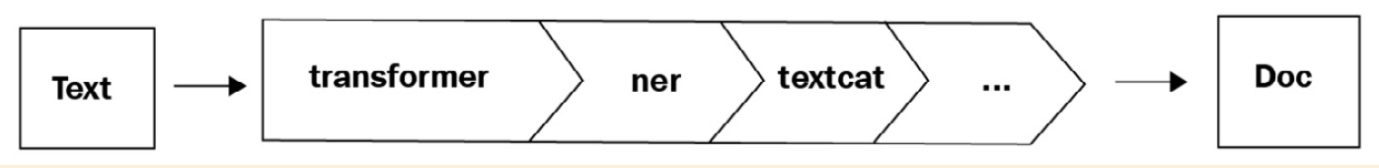

In [28]:
Image('images/transformer_spacy.PNG')

Na figura acima mostra os componentes de pipeline spaCy baseados em transformação. Para cada linguagem suportada, podemos consultar os modelos baseados em transformador e os modelos de estilo v2 na página Modelos do documentação (inglês por exemplo: https://space.io/models/en). Os modelos baseados em transformador podem ter componentes de tamanho e pipeline diferentes, assim como os modelos de estilo v2. Além disso, cada modelo também possui informações de corpus e gênero, assim como os modelos de estilo v2. Aqui está um exemplo de um modelo de linguagem baseado em transformador em inglês da página Modelos:

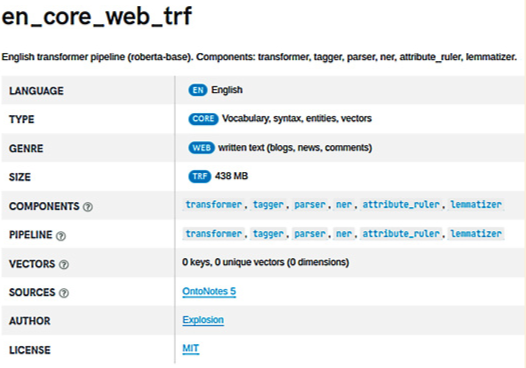

In [29]:
Image('images/models_pipeline.PNG')

Na figura acima apresenta os Modelos de linguagem spaCy English baseados em transformador. Como vemos na captura de tela anterior, o primeiro componente do pipeline é um transformador e o restante dos componentes do pipeline são os que já abordamos. O componente transformador gera as representações de palavras e lida com o algoritmo WordPiece para tokenizar palavras em subpalavras. Os vetores de palavras são alimentados para o resto do pipeline.

O download, o carregamento e o uso de modelos baseados em transformador são idênticos aos modelos de estilo v2. Atualmente, o inglês tem dois modelos baseados em transformador pré-treinados, **en_core_web_trf** e **en_core_web_lg**. Vamos começar baixando o modelo **en_core_web_trf**:

 `python3 -m spacy download en_core_web_trf`

Isso deve produzir uma saída semelhante à seguinte:
~~~python
Collecting en-core-web-trf==3.0.0
Downloading https://github.com/explosion/spacy-models/releases/download/en_core_web_trf-3.0.0/en_core_web_trf-3.0.0-py3-none-any.whl (459.7 MB)
|████████████████████████████████| 459.7 MB 40 kB/s
Requirement already satisfied: spacy<3.1.0,>=3.0.0 in /usr/local/lib/python3.6/dist-packages (from en-core-web-
trf==3.0.0) (3.0.5)
~~~
Quando o download do modelo estiver concluído, a seguinte saída deverá ser gerada:
~~~python
Successfully installed en-core-web-trf-3.0.0 spacy-alignments-0.8.3
spacy-transformers-1.0.2 tokenizers-0.10.2 transformers-4.5.1
Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
~~~

Carregar um modelo baseado em transformador também é idêntico ao que fazemos para modelos estilo v2:

In [30]:
import spacy
nlp = spacy.load("en_core_web_trf")

Depois de carregar nosso modelo e inicializar o pipeline, podemos usar este modelo da mesma forma que usamos modelos de estilo v2:

In [31]:
doc = nlp("I visited my friend Betty at her house.")
doc.ents

(Betty,)

In [32]:
for word in doc:
    print(word.pos_, word.lemma_)

PRON I
VERB visit
PRON my
NOUN friend
PROPN Betty
ADP at
PRON her
NOUN house
PUNCT .


Até aí tudo bem, mas o que há de novo então? Vamos examinar alguns recursos que vêm do componente do transformador. Podemos acessar os recursos relacionados ao componente do transformador via **doc._.trf_data.trf_data**, que contém as partes da palavra, **ids** de entrada e vetores que são gerados pelo transformador. Vamos examinar os recursos um por um:

In [33]:
doc = nlp("It went there unwillingly.")
doc._.trf_data.wordpieces

WordpieceBatch(strings=[['<s>', 'It', 'Ġwent', 'Ġthere', 'Ġunw', 'ill', 'ingly', '.', '</s>']], input_ids=array([[    0,   243,   439,    89, 10963,  1873,  7790,     4,     2]]), attention_mask=array([[1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32), lengths=[9], token_type_ids=None)

Na saída anterior, vemos cinco elementos: *word pieces (pedaços de palavras), IDs de entrada, máscaras de atenção, comprimentos e IDs de tipo de token. *Word Pieces* são as subpalavras que são geradas pelo algoritmo *WordPiece*. As palavras desta frase são as seguintes:
~~~python
<s>
It
Gwent
Gthere
Gunw
Ill
ingly
.
</s>
~~~
Aqui, **\<s>** e **\</s>** são tokens especiais e são usados na frase no início e no final. A palavra **unwillingly** é dividida em três subpalavras – **unw**, **ill** e **ingly**. O caractere **G** é usado para marcar os limites das palavras. Os tokens sem **G** são subpalavras, como **ill** e **ingly** na lista de palavras anteriores (com exceção da primeira palavra da frase, a primeira palavra da frase é marcada por **\<s>**).

Em seguida, temos que dar uma olhada em **input_ids**. Os IDs de entrada têm o mesmo significado que os IDs de entrada que introduzimos na seção Usando o tokenizer BERT. Esses são basicamente os IDs de subpalavra atribuídos pelo tokenizer do transformador.

A máscara de atenção é uma lista de 0s e 1s para apontar o transformador para os tokens aos quais ele deve prestar atenção. **0** corresponde a tokens **PAD**, enquanto todos os outros tokens devem ter um correspondente **1**.
* **lengths** é o comprimento da frase depois de dividi-la em subpalavras. Aqui, é **9** obviamente, mas observe que **len(doc)** gera **5**, enquanto spaCy sempre opera em palavras linguísticas.

* **token_type_ids** são usados por tokenizers de transformador para marcar os limites de sentença para duas tarefas de entrada de sentença, como pergunta e resposta. Aqui, fornecemos apenas um texto, portanto, esse recurso não é aplicável.

Podemos ver que os vetores token gerados pelo transformador, **doc._.trf_data.tensors**, contêm a saída do transformador, uma sequência de vetores de palavras por palavra e o vetor de saída agrupado (introduzimos esses conceitos na palavra Obtendo BERT Se você precisar atualizar sua memória, consulte esta seção:

In [35]:
doc._.trf_data.tensors[0].shape

(1, 9, 768)

In [36]:
doc._.trf_data.tensors[1].shape

(1, 768)

O primeiro elemento da tupla são os vetores para os tokens. Cada vetor tem **768** dimensões; portanto, **9** palavras produzem vetores de **9 x 768** dimensões. O segundo elemento da tupla é o vetor de saída agrupado, que é uma representação agregada para a sentença de entrada e, portanto, tem a forma **1 x 768**.

Isso conclui nossa exploração de *spaCy transformer-based pipelines*. Mais uma vez, vimos que o spaCy fornece API e empacotamento fáceis de usar, mesmo para modelos complicados, como transformadores. A integração de transformadores é outro grande motivo para usar spaCy para NLP.